In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt 
%matplotlib inline

In [2]:
data = pd.read_csv("../hw1/crawler_data.csv")
data.shape
data.drop("Date", axis=1, inplace=True)

In [3]:
print("ETF:",data.columns)

ETF: Index(['AGG', 'BND', 'BSV', 'BNDX', 'MINT', 'BIV', 'NEAR', 'SCHZ', 'FTSM',
       'SPAB', 'BLV', 'TOTL', 'IUSB', 'GVI', 'ISTB', 'BOND', 'IAGG', 'FBND',
       'VBND', 'AGGY', 'RAVI', 'ILTB', 'LDUR', 'FTSD', 'ULST', 'FLTB', 'XMPT',
       'FIBR', 'MINC', 'AGZD', 'NFLT', 'HOLD', 'FCOR', 'BYLD', 'KCNY', 'WYDE',
       'SAGG', 'AGND'],
      dtype='object')


In [4]:
data_shift_weekly = data.shift(periods=7, freq=None, axis=0)
weekly_return = ((data-data_shift_weekly)/data_shift_weekly).dropna()

data_shift_monthly = data.shift(periods=30, freq=None, axis=0)
monthly_return = ((data-data_shift_monthly)/data_shift_monthly).dropna()

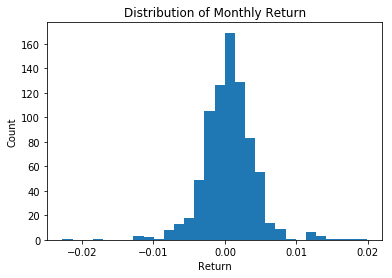

In [28]:
etf_name = "AGZD"
plt.hist(weekly_return[etf_name], bins=30)
plt.title("Distribution of Monthly Return")
plt.ylabel("Count")
plt.xlabel("Return")
plt.savefig("./{}_monthly.png".format(etf_name))
plt.show()

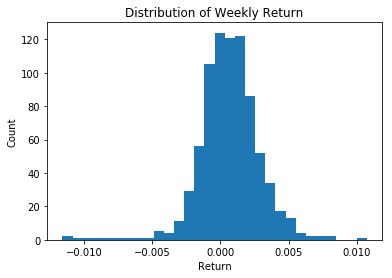

In [31]:
etf_name = "LDUR"
plt.hist(weekly_return[etf_name], bins=30)
plt.title("Distribution of Weekly Return")
plt.ylabel("Count")
plt.xlabel("Return")
plt.savefig("./{}_weekly.png".format(etf_name))
plt.show()

## 1. ASKSR

In [7]:
lamb = 1
rf = 0
def compute_ASKSR(u, sigma, S, K):
    # condition K>3+5/3*S**2
    alpha = 3*(3*K-4*S**2-9)**0.5/((sigma**2)*(3*K-5*S**2-9))
    beta = 3*S/(sigma*(3*K-5*S**2-9))
    eta = u-3*S*sigma/(3*K-4*S**2-9)
    delta = 3*sigma*(3*K-5*S**2-9)**0.5/(3*K-4*S**2-9)
    phi = (alpha**2-beta**2)**0.5
    a_star = 1/lamb*(beta+(alpha*(eta-rf))/((delta**2+(eta-rf)**2)**0.5))
    ASKSR = (2*(lamb*a_star*(eta-rf)-delta*(phi-(alpha**2-(beta-lamb*a_star))**0.5)))**0.5
    return ASKSR

In [8]:
u = weekly_return.mean()
sigma = weekly_return.std()
S = weekly_return.skew()
K = weekly_return.kurt()
# check whether the distribution following the condition for NIG distribution
print(K>3+5/3*S**2) 

AGG     False
BND     False
BSV     False
BNDX    False
MINT    False
BIV     False
NEAR    False
SCHZ    False
FTSM    False
SPAB    False
BLV     False
TOTL    False
IUSB    False
GVI     False
ISTB    False
BOND    False
IAGG    False
FBND    False
VBND    False
AGGY    False
RAVI     True
ILTB    False
LDUR     True
FTSD    False
ULST    False
FLTB    False
XMPT    False
FIBR    False
MINC    False
AGZD     True
NFLT    False
HOLD     True
FCOR     True
BYLD    False
KCNY    False
WYDE    False
SAGG    False
AGND    False
dtype: bool


In [9]:
print("ASKSR Result")
df = compute_ASKSR(u, sigma, S, K)
df.sort_values(ascending=False)

ASKSR Result


LDUR    22.851686
HOLD    15.317796
RAVI     7.731883
AGZD     3.331421
FCOR     3.119237
AGG           NaN
BND           NaN
BSV           NaN
BNDX          NaN
MINT          NaN
BIV           NaN
NEAR          NaN
SCHZ          NaN
FTSM          NaN
SPAB          NaN
BLV           NaN
TOTL          NaN
IUSB          NaN
GVI           NaN
ISTB          NaN
BOND          NaN
IAGG          NaN
FBND          NaN
VBND          NaN
AGGY          NaN
ILTB          NaN
FTSD          NaN
ULST          NaN
FLTB          NaN
XMPT          NaN
FIBR          NaN
MINC          NaN
NFLT          NaN
BYLD          NaN
KCNY          NaN
WYDE          NaN
SAGG          NaN
AGND          NaN
dtype: float64

In [10]:
u = monthly_return.mean()
sigma = monthly_return.std()
S = monthly_return.skew()
K = monthly_return.kurt()
# check whether the distribution following the condition for NIG distribution
print(K>3+5/3*S**2)
print("ASKSR Result")

AGG     False
BND     False
BSV     False
BNDX    False
MINT    False
BIV     False
NEAR    False
SCHZ    False
FTSM    False
SPAB    False
BLV     False
TOTL    False
IUSB    False
GVI     False
ISTB    False
BOND    False
IAGG    False
FBND    False
VBND    False
AGGY    False
RAVI    False
ILTB    False
LDUR    False
FTSD    False
ULST    False
FLTB    False
XMPT    False
FIBR    False
MINC    False
AGZD     True
NFLT    False
HOLD    False
FCOR    False
BYLD    False
KCNY    False
WYDE    False
SAGG    False
AGND    False
dtype: bool
ASKSR Result


In [11]:
df = compute_ASKSR(u, sigma, S, K)
df.sort_values(ascending=False)

AGZD    11.629671
AGG           NaN
BND           NaN
BSV           NaN
BNDX          NaN
MINT          NaN
BIV           NaN
NEAR          NaN
SCHZ          NaN
FTSM          NaN
SPAB          NaN
BLV           NaN
TOTL          NaN
IUSB          NaN
GVI           NaN
ISTB          NaN
BOND          NaN
IAGG          NaN
FBND          NaN
VBND          NaN
AGGY          NaN
RAVI          NaN
ILTB          NaN
LDUR          NaN
FTSD          NaN
ULST          NaN
FLTB          NaN
XMPT          NaN
FIBR          NaN
MINC          NaN
NFLT          NaN
HOLD          NaN
FCOR          NaN
BYLD          NaN
KCNY          NaN
WYDE          NaN
SAGG          NaN
AGND          NaN
dtype: float64

## 2. Omega ratio

$\Omega(r) = 1+\frac{u-r}{E[max(r-x,0)]}$

In [12]:
def compute_omega(x,u,r=0.01):
    ept =  np.average([max(r-i,0) for i in x])
    return 1+(u-r)/ept

In [13]:
u = weekly_return.mean()

In [14]:
omega_list = []
for etf in weekly_return.columns:
    omega_measure = compute_omega(weekly_return[etf], u[etf], r=0.01)
#     print("{}:{:.7f}".format(etf,omega_measure))
    omega_list.append(omega_measure)
ranked_etf_B_weekly = list(weekly_return.columns[np.argsort(omega_list)[::-1]])
df = pd.DataFrame(ranked_etf_B_weekly)
df = df.set_index([pd.Index([i+1 for i in range(len(df))])])
df.columns = ["ETF_Symbol"]

In [15]:
df

,ETF_Symbol
1,BLV
2,ILTB
3,XMPT
4,KCNY
5,WYDE
6,AGND
7,FCOR
8,BIV
9,AGGY
10,NFLT


In [16]:
omega_list = []
for etf in monthly_return.columns:
    omega_measure = compute_omega(monthly_return[etf], u[etf], r=0.01)
#     print("{}:{:.7f}".format(etf,omega_measure))
    omega_list.append(omega_measure)
    
ranked_etf_B_monthly = list(weekly_return.columns[np.argsort(omega_list)[::-1]])

df = pd.DataFrame(ranked_etf_B_monthly)
df = df.set_index([pd.Index([i+1 for i in range(len(df))])])
df.columns = ["ETF_Symbol"]

In [17]:
df

,ETF_Symbol
1,WYDE
2,XMPT
3,BLV
4,ILTB
5,KCNY
6,SAGG
7,FIBR
8,VBND
9,BIV
10,AGND


## 3. A global index of riskiness

In [18]:
weekly_return["AGG"]

8      0.005370
9      0.008058
10     0.007221
11     0.004611
12     0.003689
13     0.002301
14     0.003784
15     0.002302
16    -0.000551
17     0.001103
18     0.000092
19     0.001930
20     0.004040
21     0.004209
22     0.006509
23     0.006972
24     0.006690
25     0.005585
26     0.008615
27     0.005572
28     0.009267
29     0.006861
30     0.004208
31     0.000731
32     0.001098
33     0.000274
34     0.000547
35    -0.001636
36    -0.002090
37     0.001002
         ...   
778    0.003909
779    0.006541
780    0.006543
781    0.004376
782    0.004372
783    0.000355
784    0.002618
785    0.001684
786    0.001027
787    0.002335
788    0.002428
789    0.000280
790   -0.000933
791    0.001399
792    0.002896
793    0.002518
794   -0.000373
795   -0.002701
796   -0.004409
797   -0.000962
798   -0.002821
799   -0.001048
800    0.000635
801    0.004089
802    0.005964
803    0.009472
804    0.007774
805    0.005616
806    0.006636
807    0.003635
Name: AGG, Length: 800, 

In [19]:
def compute_global_index(return_df):
    global_index = []
    for etf in return_df.columns:
        x = return_df[etf]

        def f(alpha):
            return np.average(np.exp(-alpha*x))-1


        alpha_init = np.array([0.5])
        res = opt.minimize(f,alpha_init)
        solved_alpha = res.x[0]
        q = np.exp(-solved_alpha)
        global_index.append(q)
    return global_index

weekly_global_index = compute_global_index(weekly_return)
ranked_etf_C_weekly = list(weekly_return.columns[np.argsort(weekly_global_index)[::-1]])
df = pd.DataFrame(ranked_etf_C_weekly)
df = df.set_index([pd.Index([i+1 for i in range(len(df))])])
df.columns = ["ETF_Symbol"]
df

,ETF_Symbol
1,WYDE
2,SAGG
3,XMPT
4,AGND
5,BLV
6,FIBR
7,ILTB
8,KCNY
9,VBND
10,BIV


In [20]:
monthly_global_index = compute_global_index(monthly_return)
ranked_etf_C_monthly = list(monthly_return.columns[np.argsort(monthly_global_index)[::-1]])
df = pd.DataFrame(ranked_etf_C_monthly)
df = df.set_index([pd.Index([i+1 for i in range(len(df))])])
df.columns = ["ETF_Symbol"]
df

,ETF_Symbol
1,WYDE
2,SAGG
3,XMPT
4,FIBR
5,BLV
6,ILTB
7,KCNY
8,VBND
9,AGND
10,BIV


## ranking comparison

In [22]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]



In [25]:
# weekly, monthly ranking difference

print("B:",edit_distance(ranked_etf_B_weekly, ranked_etf_B_monthly))
print("C:",edit_distance(ranked_etf_C_weekly, ranked_etf_C_monthly))

B: 34
C: 21


In [26]:
# weekly, monthly ranking difference

print("B:",edit_distance(ranked_etf_B_weekly, ranked_etf_C_weekly))
print("C:",edit_distance(ranked_etf_B_monthly, ranked_etf_C_monthly))

B: 34
C: 29
